In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import geocoder
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


In [3]:
# USA States data & cleansing
df= pd.read_csv('C:/Users/rmarathe/Desktop/Projects/Coursera-Capstone/USA_States_cities.csv')

In [4]:
df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [31]:
df.shape

(28889, 19)

In [6]:
#setting up empty dataframes

df_r = pd.DataFrame() #restuarants datframe
df_uni = pd.DataFrame() # Univeristies datframe
df_ta = pd.DataFrame() # Tourist Attractions datframe

In [25]:
df1 = df[df['population']>100000] # population 0.1M

In [16]:
#df1['state_id'].value_counts()
#df1[['state_id','city','lat','lng']][df1['state_id']=='CA']
df2 =df1[['state_id','city','lat','lng','population']].sort_values(by ='state_id')

In [41]:
print(df2.head())
print(df2.tail())
df2.shape

      state_id        city      lat       lng  population
6624        AK   Anchorage  61.1508 -149.1091      253421
14439       AL  Birmingham  33.5277  -86.7987      744189
14440       AL  Montgomery  32.3473  -86.2666      255908
14524       AL  Tuscaloosa  33.2348  -87.5266      154204
14867       AL  Huntsville  34.6988  -86.6412      309716
     state_id        city      lat      lng  population
1259       WI   La Crosse  43.8241 -91.2268      101886
1340       WI  Eau Claire  44.8200 -91.4951      107068
1105       WI     Kenosha  42.5864 -87.8762      124888
1608       WV  Charleston  38.3484 -81.6323      142858
1798       WV  Huntington  38.4109 -82.4344      194155


(451, 5)

In [32]:
CLIENT_ID = 'YBCPSEG3FO2VBAYYH11GH2OF0NL3YTZMKF34WRMIPL2RTHFH'
CLIENT_SECRET = '4A3UAJ1EIUPABM4NY3TG2YE4OBQQEJ3IDEZLH31QK1SZ5GI0'
VERSION = '20180604'
LIMIT=10

In [43]:
# fetch Chipotle stores in NY
search_query = 'Chipotle'
radius = 5000
latitude = 40.730610
longitude = -73.935242
url_r = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION, search_query, radius, LIMIT)
print(url_r)
results = requests.get(url_r).json()
results

https://api.foursquare.com/v2/venues/search?client_id=YBCPSEG3FO2VBAYYH11GH2OF0NL3YTZMKF34WRMIPL2RTHFH&client_secret=4A3UAJ1EIUPABM4NY3TG2YE4OBQQEJ3IDEZLH31QK1SZ5GI0&ll=40.73061,-73.935242&v=20180604&query=Chipotle&radius=5000&limit=10


{'meta': {'code': 200, 'requestId': '5da29195db1d810033a0570e'},
 'response': {'venues': [{'id': '5812814538fab453bcc7a752',
    'name': 'Chipotle Mexican Grill',
    'location': {'address': '130 N 4th St',
     'crossStreet': 'Bedford',
     'lat': 40.71662536264234,
     'lng': -73.96054437301638,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.71662536264234,
       'lng': -73.96054437301638}],
     'distance': 2641,
     'postalCode': '11249',
     'cc': 'US',
     'city': 'Brooklyn',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['130 N 4th St (Bedford)',
      'Brooklyn, NY 11249',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d153941735',
      'name': 'Burrito Place',
      'pluralName': 'Burrito Places',
      'shortName': 'Burritos',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burrito_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1570935189',
    'hasPerk':

In [50]:
venues_NY = results['response']['venues'] # stores in NY
df_NY = json_normalize(venues_NY)
df_NY.shape

(10, 17)

In [52]:
# fetch Chipotle store information using Foursquare API for all cities with population >100,000
for i,lng in enumerate(df2['lng']):
 #   print(df2.iloc[i]['lat'],df2.iloc[i]['lng'])
    latitude = df2.iloc[i]['lat']
    longitude = df2.iloc[i]['lng']
    url_r = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION, search_query, radius, LIMIT)
    #print(url_r)
    results = requests.get(url_r).json()
    venues = results['response']['venues']
    df_r = df_r.append(json_normalize(venues))
    print('Appended')
               

Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
Appended
A

In [76]:
# Dataframe size of Chipotle restaurant outets in USA for population >100000
print(df_r.shape)
#print(df_r.head())
#df_r.describe()

(1686, 24)


In [111]:
df_g = df_r[['location.state','id']].groupby(['location.state']).count().sort_values(by ='id').reset_index()#by='id') #)
df_g

,location.state,id
0,WV,2
1,MT,2
2,VT,2
3,ND,2
4,DE,2
5,OK,4
6,ME,4
7,RI,4
8,NM,6
9,IA,6


In [56]:
!pip install folium
import folium # map rendering library

In [1115]:
#create map of USA using latitude and longitude values
map_usa = folium.Map(location=[37.0902,-95.7129], zoom_start=4)
#map_usa

In [58]:
# mark all stores in USA  using latitude and longitude values
map_chipotle_outlets = folium.Map(location=[37.0902,-95.7129], zoom_start=4)
# add markers to map
for lat, lng, postalcode in zip(df_r['location.lat'], df_r['location.lng'],df_r['location.postalCode']):
    label = '{}'.format(postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup = label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chipotle_outlets)  
    
map_chipotle_outlets

In [60]:
# plot 3 features
df3 = df2.sort_values(by='population')
df3.head()

,state_id,city,lat,lng,population
4687,TX,Longview,32.5192,-94.7622,100196
4788,TX,Allen,33.1088,-96.6735,100685
22697,UT,Logan,41.7400,-111.8419,100774
13124,CA,Vacaville,38.3590,-121.9680,100801
25431,MI,Holland,42.7677,-86.0984,100885


In [113]:
print(df_r.columns)
print(df_r[['location.state', 'location.city','location.distance','location.neighborhood','location.lat',
       'location.lng']][df_r['location.state']=='NY'])


Index(['categories', 'delivery.id', 'delivery.provider.icon.name',
       'delivery.provider.icon.prefix', 'delivery.provider.icon.sizes',
       'delivery.provider.name', 'delivery.url', 'hasPerk', 'id',
       'location.address', 'location.cc', 'location.city', 'location.country',
       'location.crossStreet', 'location.distance',
       'location.formattedAddress', 'location.labeledLatLngs', 'location.lat',
       'location.lng', 'location.neighborhood', 'location.postalCode',
       'location.state', 'name', 'referralId'],
      dtype='object')
   location.state     location.city  location.distance location.neighborhood  \
0              NY          New York               4842                   NaN   
1              NY          New York               4833                   NaN   
3              NY          New York               5272                   NaN   
5              NY          New York               5001                   NaN   
8              NY          New York         

In [ ]:
# search educational Institutes & Universities in NY (max stores ...find the location of the next store)
latitude = 40.671180 #NY
longitude = -73.935242#NY

search_id = 'university'
search_query2 ='attraction'


url_u_NY = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION,radius, LIMIT)
url_u_NY
results_u_NY = requests.get(url_u_NY).json()

#print(results_u_NY)

# assign Educational Institutes JSON to df_uni
outlet_u_NY = results_u_NY['response']['venues']
print('tranform venues into a dataframe by appending previous')
df_uni_NY = json_normalize(outlet_u_NY)
print('Appended....University_NY')

#search Tourist attractions...NY...delete later or merge above
url_ta_NY = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION, search_query2, radius, LIMIT)
 #url_ta
results_ta_NY = requests.get(url_ta_NY).json()
# assign relevant part of JSON to tourist_attactions
tourist_attactions_NY = results_ta_NY['response']['venues']
# tranform venues into a dataframe
df_ta_NY = json_normalize(tourist_attactions_NY)
print('Appended....Attraction_NY')

In [73]:
#print(df_uni_NY.head())
print(df_uni_NY.shape) # Univerisities in NY
#print(df_ta_NY.head())
print(df_ta_NY.shape)# Attractions in NY

(10, 17)
(5, 17)


In [80]:
df_uni_NY.columns

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.distance', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.postalCode', 'location.state', 'name', 'referralId'],
      dtype='object')

In [94]:
# mark stores in NY using latitude and longitude values
latitude = 40.671180 #NY
longitude = -73.935242#NY
map_chipotle_outlets = folium.Map(location=[40.671180,-73.935242], zoom_start=12)

for lat, lng, postalcode in zip(df_r['location.lat'], df_r['location.lng'],df_r['location.postalCode']):
    label = '{}'.format(postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup = label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chipotle_outlets)    

# add UNI markers to map
for lat, lng, postalcode in zip(df_uni_NY['location.lat'], df_uni_NY['location.lng'],df_uni_NY['location.postalCode']):
    label = '{}'.format(postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup = label,
        color='red',
        fill=True,
        fill_color='#3186bb',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chipotle_outlets)
    
# add Attractions store markers to map
for lat, lng, postalcode in zip(df_ta_NY['location.lat'], df_ta_NY['location.lng'],df_ta_NY['location.postalCode']):
    label = '{}'.format(postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup = label,
        color='green',
        fill=True,
        fill_color='#3186aa',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chipotle_outlets)
  
map_chipotle_outlets

In [ ]:
# code for fetching uni & attraction in all states - multiple cities - generating restrictions on API requests...

# search educational Institutes
#latitude = 32.5192 #Longview
#longitude = -94.7622
search_id = 'University'
search_query2 ='attraction'


for i,state in enumerate(df2['state_id']):
 #   print(df2.iloc[i]['lat'],df2.iloc[i]['lng'])
    latitude = df2.iloc[i]['lat']
    longitude = df2.iloc[i]['lng']
    url_u = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION,search_id,radius, LIMIT)
    #url_u
    results_u = requests.get(url_u).json()
    #results_u
    # assign Educational Institutes JSON to df_uni
    outlet_u = results_u['response']['venues']
    # tranform venues into a dataframe by appending previous
    df_uni = df_uni.append(json_normalize(outlet_u))
    print('Appended....University')
    #search Tourist attractions
    url_ta = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude,VERSION, search_query2, radius, LIMIT)
    #url_ta
    results = requests.get(url_ta).json()
    # assign relevant part of JSON to tourist_attactions
    tourist_attactions = results['response']['venues']
    # tranform venues into a dataframe
    df_ta = df_ta.append(json_normalize(tourist_attactions))
    print('Appended....Attraction')
    
    
    


In [23]:
# calculate Euclidean distance
# dist between two places = sqrt((x1-x2)**2 + (y1-y2)**2)
y = np.sqrt((32.557117-32.5192)**2 + (-94.73259+94.7622)**2)
print (y)

0.048108741295115234


In [865]:
# function to add a 'population' column to restaurants dataframe # remove later


def f_search(x):
    
    for i,city in enumerate(df2['city']):
            if x == city:
                p = df2.loc[df2.index[i]]['population']
                #print(p)
                return p

l_list = df_r.apply(lambda x: f_search(x['location.city']), axis=1)
df_r['population'] = l_list



In [955]:
# Groupby and sort Statewise, citywise# No of outlets
#df_g=df_r[['location.state','location.city','id']].groupby(['location.state','location.city']).count().sort_values(by ='location.state')#by='id') #)
df_g=df_r[['location.state','id']].groupby(['location.state']).count().sort_values(by ='id').reset_index()#by='id') #)
#df_g

In [63]:
df_r.head()
df_r.shape

(327, 24)

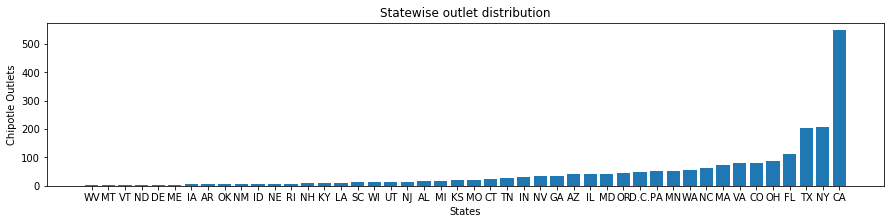

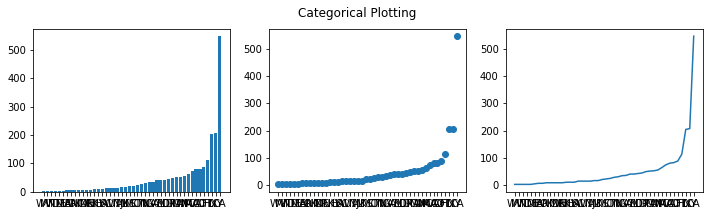

In [1075]:
plt.figure(figsize=(15,3))
y_pos=np.arange(len(df_g['location.state']))
plt.bar(y_pos, df_g['id'])
plt.xticks(y_pos,df_g['location.state'])
plt.title('Statewise outlet distribution')
plt.xlabel('States')
plt.ylabel('Chipotle Outlets')
plt.show()

names = df_g['location.state']
values = df_g['id']

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()



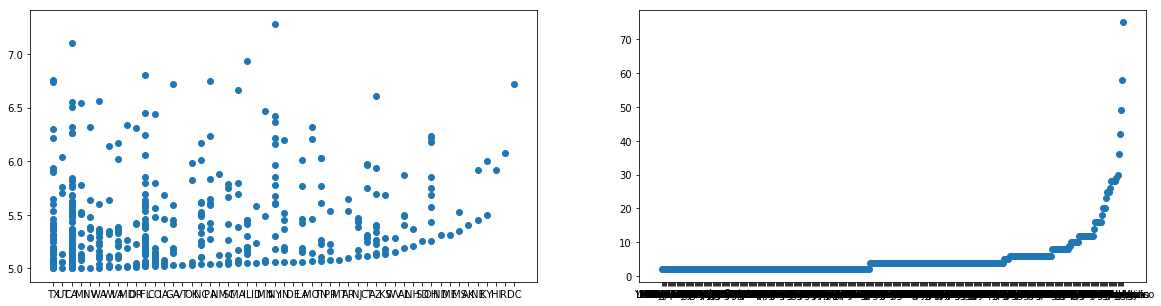

In [988]:
df_cg=df_r[['location.city','id']].groupby(['location.city']).count().sort_values(by ='id').reset_index()#by='id') #)
#df_g

plt.figure(figsize=(20,5))
city1 = df3['state_id']
pop = (np.log10(df3['population']))

city_o = df_cg['location.city']
outlet = df_cg['id']

#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.subplot(121)
plt.scatter(city1,pop)
plt.subplot(122)
plt.scatter(city_o, outlet)            
plt.show()